In [1]:
import functools
import numpy as np
import sklearn.metrics
import sklearn.datasets
import sklearn.model_selection
import matplotlib.pyplot as plt

In [2]:
from pso.pso import *
from pso.utils import *
from pso.mlp import *

In [3]:
# Load MNIST digits from sklearn
num_classes = 10
mnist = sklearn.datasets.load_digits(n_class=num_classes)
X, X_test, y, y_test = sklearn.model_selection.train_test_split(mnist.data, mnist.target, test_size=0.33)

num_inputs = X.shape[1]

y_true = np.zeros((len(y), num_classes))
for i in range(len(y)):
    y_true[i, y[i]] = 1

y_test_true = np.zeros((len(y_test), num_classes))
for i in range(len(y_test)):
    y_test_true[i, y_test[i]] = 1


In [4]:
# Set up
shape = (num_inputs, 128, 64, num_classes)  # Increase the number of neurons in the hidden layers

obj_func = functools.partial(eval_neural_network, shape=shape, X=X, y=y_true.T)

swarm = ParticleSwarm(obj_func, num_dimensions=dim_weights(shape), num_particles=20, print_epochs=False)  # Increase the number of particles

In [5]:
# Train...
result = swarm.minimize(1000, X, y, shape)

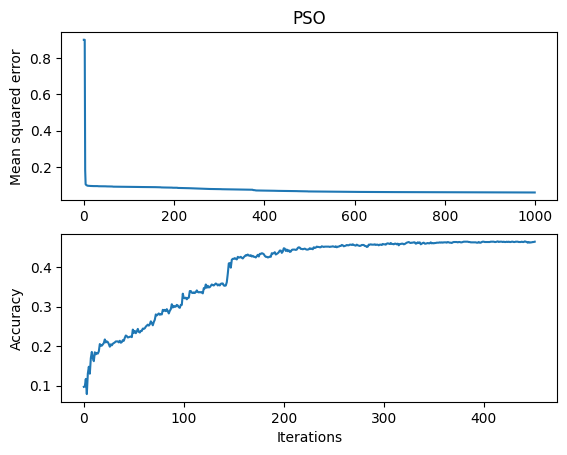

In [6]:
best_scores = result.best_scores
accuracies = result.accuracies
# Plot
error = [tup[0] for tup in best_scores]
iters = [tup[1] for tup in best_scores]
figure = plt.figure()
errorplot = plt.subplot(2, 1, 1)
errorplot.plot(error, iters)
plt.title("PSO")
plt.ylabel("Mean squared error")

accuracyplot = plt.subplot(2, 1, 2)
accuracyplot.plot(accuracies)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")

plt.show()

In [7]:
# Test...
best_weights = vector_to_weights(swarm.Gbest, shape)
best_nn = MultiLayerPerceptron(shape, weights=best_weights)
y_test_pred = np.round(best_nn.run(X_test))
print(sklearn.metrics.classification_report(y_test_true, y_test_pred.T))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.66      0.67      0.67        61
           2       0.00      0.00      0.00        52
           3       0.85      0.60      0.70        67
           4       0.85      0.74      0.79        54
           5       0.00      0.00      0.00        66
           6       0.96      0.80      0.87        55
           7       0.00      0.00      0.00        69
           8       0.00      0.00      0.00        57
           9       0.70      0.55      0.61        64

   micro avg       0.79      0.34      0.47       594
   macro avg       0.40      0.34      0.36       594
weighted avg       0.41      0.34      0.37       594
 samples avg       0.33      0.34      0.33       594



C:\Users\mbber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mbber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
